# Advanced Calculus with Financial Engineering Applications - Homework 5
### *Jose Ferreira*

---------------------------------------------------------------------------------------
**1. Use Newton’s method to find the yield of a three year semiannual coupon bond with 4% coupon rate and price 101.** 
**What are the modified duration and the convexity of the bond?**

The price of a bond, with compounding interest frequency of m times a year, is given by: 
$$B = \sum_{i=1}^{n} c_i \left(1+ \frac{y}{m}\right)^{-mt_i}$$
And therefore, to calculate yield, we need to find a zero for the function: 
$$f(y) = \sum_{i=1}^{n} c_i \left(1+ \frac{y}{m}\right)^{-mt_i} - B$$
Which has derivative equal to: 
$$f'(y) = -\sum_{i=1}^{n} t_ic_i \left(1+ \frac{y}{m}\right)^{-mt_i-1}$$
The recursion formula to use with Newton's method is, then: 
$$y_{k+1} = y_k - {f(y_k) \over f'(y_k)} = y_{k} + {\sum_{i=1}^{n} c_i \left(1+ \frac{y_k}{m}\right)^{-mt_i} - B \over \sum_{i=1}^{n} t_ic_i \left(1+ \frac{y}{m}\right)^{-mt_i-1} }$$
We can calculate the bond duration and convexity as:

\begin{align}
D = -\left(\frac{1}{B}\right)f'(y) &= \left(\frac{1}{B}\right)\sum_{i=1}^{n} t_ic_i \left(1+ \frac{y}{m}\right)^{-mt_i-1}\\
C = \left(\frac{1}{B}\right)f''(y) &= \left(\frac{1}{B}\right)\sum_{i=1}^{n} t_ic_i \left(t_i+ \frac{1}{m}\right)\left(1+ \frac{y}{m}\right)^{-mt_i-2}\\
\end{align}


In [3]:
import numpy as np

def bond_yield(price, cf_times, cf_values, freq, x0, tol):
    x_new = x0
    x_old = x0 - 1
    while np.abs(x_new - x_old) > tol:
        x_old = x_new
        p_k, d_k, _ = bond_price_duration_convexity(x_old, cf_times, cf_values, freq)
        # the derivative of the price function differs by factor 1/B from duration    
        derivative_term = d_k*p_k 
        x_new = x_old + (p_k - price)/derivative_term
        print("|" + str(x_new) + "\t|" + str(np.abs(x_new - x_old)) + "\t|")
    return x_new

In [4]:
def bond_price_duration_convexity(yield_k, cf_times, cf_values, freq):
    n = np.minimum(len(cf_times), len(cf_values))
    B = 0
    D = 0
    C = 0
    for i in range(0, n):
        B = B + cf_values[i]*(1+(yield_k/freq))**(-freq*cf_times[i])
        D = D + cf_times[i]\
                *cf_values[i]\
                *(1+(yield_k/freq))**(-freq*cf_times[i]-1)
        C = C + cf_times[i]\
                *cf_values[i]\
                *(cf_times[i] + 1/freq)\
                *(1+(yield_k/freq))**(-freq*cf_times[i]-2)
    return B, D/B, C/B

In [5]:
B = 101
t_cf = [0.5, 1, 1.5, 2, 2.5, 3]
v_cf = [2, 2, 2, 2, 2, 102]
tol = 1e-12
x0 = 0.05
freq = 2

print ("Yield - Intermediate values")

print ("\n|Estimation\t\t|Tolerance\t\t|")
print ("-------------------------------------------------")
yld = bond_yield(B, t_cf, v_cf, freq, x0, tol)
print ("=================================================")
print ("\nYield = " + str(yld))
price, duration, convexity = bond_price_duration_convexity(yld, t_cf, v_cf, freq)
print ("Modified Duration = " + str(duration))
print ("Convexity = " + str(convexity))

Yield - Intermediate values

|Estimation		|Tolerance		|
-------------------------------------------------
|0.036137186823403195	|0.0138628131766	|
|0.03645067085119867	|0.000313484027795	|
|0.03645083711230677	|1.66261108096e-07	|
|0.036450837112353196	|4.6428139111e-14	|

Yield = 0.036450837112353196
Modified Duration = 2.8064296479886104
Convexity = 9.488341645714605


---------------------------------------------------------------------------------------
**2. (i) Find the yield of a 25 months semiannual coupon bond with coupon rate 3.5%, if the risk–free zero rate curve is 
$$r(0, t) = 0.015 + \frac{t}{100 + \sqrt{1+t^2}}$$**

We can calculate the price of the bond with equation:

\begin{align}
B = \sum_{i=1}^{n} c_i \left(1+ \frac{r_m(0, t_i)}{m}\right)^{-mt_i} &&\tag{2.70 - textbook}
\end{align}

Assuming the r(0,t) given is for continuous compounding, we can obtain $r_m(0, t_i)$ from:

\begin{align}
r_m(0,t) & = m\left(exp\left(\frac{r_{cont}(0,t)}{m}\right) - 1\right) &&\tag{2.63 - textbook}\\
& = 2\left(exp\left(\frac{0.015 + \frac{t}{100 + \sqrt{1+t^2}}}{2}\right) - 1\right) &&\tag{m=2}\\
& = 2\left(exp\left(0.0075 + \frac{t}{2(100 + \sqrt{1+t^2})}\right) - 1\right) \\
\end{align}

Once $B$, the price of the bond, is known, the yield can be obtained using the methods from point 1.

In [6]:
def zero_rate(t, m):
    fraction = t/(m*(100 + np.sqrt(1 + t**2)))
    return m*(np.exp(0.0075 + fraction)-1)

def bond_price_from_zero_rate(v_cf, t_cf, freq, zero_rate):
    n = np.minimum(len(v_cf), len(t_cf))
    B = 0
    for i in range(0, n):
        B = B + v_cf[i]*(1 + zero_rate(t_cf[i], freq)/freq)**(-freq*t_cf[i])
    return B    

In [7]:
t_cf = [1/12, 7/12, 13/12, 19/12, 25/12] # 25-month semiannual cashflow time periods
v_cf = [1.75, 1.75, 1.75, 1.75, 101.75] # coupon = 3.5% 
tol = 1e-12
x0 = 0.035
freq = 2

price = bond_price_from_zero_rate(v_cf, t_cf, freq, zero_rate)
print ("\nYield - Intermediate values")
print ("|Estimation\t\t|Tolerance\t\t|")
print ("-------------------------------------------------")
estimated_yield = bond_yield(price, t_cf, v_cf, freq, x0, tol)

print ("\nPrice = " + str(price))
print ("Yield = " + str(estimated_yield))


Yield - Intermediate values
|Estimation		|Tolerance		|
-------------------------------------------------
|0.0354361030136	|0.000436103013568	|
|0.0354363423313	|2.393177502e-07	|
|0.0354363423314	|7.16648962396e-14	|

Price = 101.369304142
Yield = 0.0354363423314


**(ii) What are the modified duration and convexity of the bond?**

In [6]:
_, duration, convexity = bond_price_duration_convexity(estimated_yield, t_cf, v_cf, freq)
print ("Modified Duration = " + str(duration))
print ("Convexity = " + str(convexity))

Modified Duration = 1.961946619757132
Convexity = 4.928656560190025


---------------------------------------------------------------------------------------
**3. Consider a call option with strike K and maturity T, on a lognormally distributed underlying asset with spot price S, volatility σ, and paying dividends continuously at rate q. Assume that the risk–free interest rates are constant equal to r.** 


**(i) Finding the value of the strike price such that the $\Delta$ of the call is 0.5 requires solving**

\begin{align}
\Delta(C) = e^{-qT}N(d_1) = \frac{1}{2} &&\tag{1}
\end{align}

**for K, where N(x) be the cumulative density of the standard normal variable and
$$d_1 = \frac{ln\left(\frac{S}{K}\right) + \left(r - q + \frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}$$
Write down the Newton’s method recursion for solving (1) for K.**

We need to find a zero for the function: 
$$f(k) = e^{-qT}N(d_1(k)) - \frac{1}{2}$$

The derivative of $f(k)$ is equal to: 

\begin{align}
f'(k) = \frac{\partial \Delta(C(k))}{\partial K} & = e^{-qT}N'(d_1(k))\frac{\partial d_1(k)}{\partial K} \\
& = -\frac{1}{K\sigma\sqrt{2\pi T}}e^{-qT-\frac{d_1^2}{2}}\\
\end{align}

The recursion formula to use with Newton's method is, then: 

\begin{align}
k_{i+1} & = k_i - {f(k_i) \over f'(k_i)}\\
& = k_{i} + \frac{e^{-qT}N(d_1(k)) - \frac{1}{2}}{\frac{1}{K\sigma\sqrt{2\pi T}}e^{-qT-\frac{d_1^2}{2}}}\\
& = k_i + \sqrt{2\pi T}K\sigma e^{\frac{d_1^2}{2} + qT}\left(e^{-qT}N(d_1) - \frac{1}{2}\right)\\
\end{align}

where 
$$d1 = \frac{ln\left(\frac{S}{K}\right) + \left(r - q + \frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}$$

**(ii) Consider a lognormally distributed asset with spot price 30, volatility 30%, and paying 1% dividends continuously.
Assume that the risk–free interest rates are constant equal to 2.5%. Find the strike at which the $\Delta $ of a three months call on this asset is 0.5. 
Start with an ATM strike and use Newton’s method with tol = 10−6. 
Report all intermediate values from Newton’s method.**

In [7]:
def cdf_normal(t):
    z = np.abs(t)
    y = 1/(1 + 0.2316419*z)
    a1 = 0.31938153
    a2 = -0.356563782
    a3 = 1.781477937
    a4 = -1.821255978
    a5 = 1.330274429
    m = 1 - np.exp(-t**2/2)\
            *(a1*y + a2*y**2 + a3*y**3 + a4*y**4 + a5*y**5)/np.sqrt(2*np.pi)
    if t > 0:
        return m
    else:
        return 1 - m

def delta(S, K, T, sigma, r, q):
    d1 = (np.log(S/K) + (r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    return np.exp(-q*T)*cdf_normal(d1)

def d_delta_k(S, K, T, sigma, r, q):
    d1 = (np.log(S/K) + (r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    return np.exp(-q*T - d1**2/2)/(K*sigma*np.sqrt(2*np.pi*T))

def find_call_strike_half_delta(S, T, sigma, r, q, tol):
    x0 = S
    x_new = x0
    x_old = x0 - 1
    while np.abs(x_new - x_old) > tol:
        x_old = x_new
        x_new = x_new + (delta(S, x_new, T, sigma, r, q) - 1/2)\
                        /d_delta_k(S, x_new, T, sigma, r, q)
        print("|%.12f|%.12f\t|"%(x_new, np.abs(x_new - x_old)))
    return x_new

In [8]:
S = 30
sigma = 0.3
q = 0.01
r = 0.025
T = 0.25
tol = 1e-6
print("Strike for half call delta - Newton's method")
print ("|Estimation\t|Tolerance\t|")
print ("---------------------------------")
strike = find_call_strike_half_delta(S, T, sigma, r, q, tol)
print ("\nStrike = " + str(strike))

Strike for half call delta - Newton's method
|Estimation	|Tolerance	|
---------------------------------
|30.437315485006|0.437315485006	|
|30.439064561337|0.001749076330	|
|30.439064600067|0.000000038730	|

Strike = 30.4390646001


In [9]:
#Test that indeed the delta of the call for the strike found is 0.5
delta_test = delta(S, strike, T, sigma, r, q)
print ("Delta = " + str(delta_test))

Delta = 0.5


---------------------------------------------------------------------------------------
#### 4.  Use bootstrapping to obtain a zero rate curve given the prices of the following semiannual coupon bonds:
| Maturity | Coupon Rate | Price |
|----------|-------------|-------|
| 6 months | 0           | 97.5  |
| 1 year   | 5           | 100   |
| 3 years  | 5           | 102   |
| 5 years  | 6           | 104   |
#### Assume that the overnight rate is 5%. 
#### Report the zero rates corresponding to each cash flow date; include the overnight rate.
#### For the Newton’s methods corresponding to the 3–year bond, report the iteration counts and every approximate value. The stopping criterion for each Newton’s method is that two consecutive approximations are within 10−6 of each other, and the initial guess is x0 = 0.05.

For a zero coupon bond the expression that allows us to determine the 6-months rate is:
$$B = 100e^{-t r(0,t)}$$
In the case of the first bond: 
$$97.5 = 100e^{-0.5 r(0, 0.5)}$$
$$r(0,0.5) = 2\log{\frac{100}{97.5}} \approx 0.05063561596858$$ 

For the 1-year bond:

$$100 = 2.5e^{-0.5 r(0,0.5)} + 102.5e^{-r(0,1)}$$

$$r(0,1) \approx 0.04936960030281$$ 

For the 3-year bond, the equation is:

\begin{align}
102 =& 2.5e^{-0.5r(0,0.5)}\\
&+ 2.5e^{-r(0,1)}\\ 
&+ 2.5e^{-1.5r(0,1.5)}\\ 
&+ 2.5e^{-2r(0,2)}\\ 
&+ 2.5e^{-2.5r(0,2.5)}\\ 
&+ 102.5e^{-3r(0,3)} \tag 1      
\end{align}

Assuming rates are linear in the t=[1,3] interval and therefore:

\begin{align}
r(0,t) = \left(\frac{t-1}{2}\right)r(0,3) + \left(\frac{3-t}{2}\right)r(0,1) &&\forall 1\leq t\leq 3\\
\end{align}

We can express (1) in terms of the known rates r(0,0.5), r(0,1) and the unknown r(0,3) using:

\begin{align}
r(0,1.5) = \frac{1}{4}r(0,3) + \frac{3}{4}r(0,1);\\ 
r(0,2) = \frac{1}{2}(r(0,3) + r(0,1));\\ 
r(0,2.5) = \frac{3}{4}r(0,3) + \frac{1}{4}r(0,1)\\
\end{align}


And we can try solving the non-linear equation resulting from replacing these intermediate values using the Newton's method:

\begin{align}
f(x) =& 2.5e^{-0.5r(0,0.5)}\\ 
&+ 2.5e^{-r(0,1)}\\ 
&+ 2.5e^{-1.5(\frac{1}{4}x + \frac{3}{4}r(0,1))}\\ 
&+ 2.5e^{-2(\frac{1}{2}(x + r(0,1)))}\\ 
&+ 2.5e^{-2.5(\frac{3}{4}x + \frac{1}{4}r(0,1))}\\ 
&+ 102.5e^{-3x}\\ 
&- 102; && \tag{$x = r(0,3)$}\\ 
\end{align}

\begin{align}
f'(x) =& -\frac{2.5*1.5}{4}e^{-1.5(\frac{1}{4}x + \frac{3}{4}r(0,1))}\\ 
&- 2.5e^{-(x + r(0,1))}\\ 
&- \frac{2.5*2.5*3}{4}e^{-2.5(\frac{3}{4}x + \frac{1}{4}r(0,1))}\\  
&- (102.5*3)e^{-3x}\\
\end{align}

In [10]:
def f(x, r_0_5, r_1, c):
    t1 = c*np.exp(-0.5*r_0_5)
    t2 = c*np.exp(-r_1)
    t3 = c*np.exp(-1.5*((x/4) + ((3*r_1)/4)))
    t4 = c*np.exp(-(x + r_1))
    t5 = c*np.exp(-2.5*(((3*x)/4) + (r_1/4)))
    t6 = (100 + c)*np.exp(-3*x)
    return t1 + t2 + t3 + t4 + t5 + t6

def f_prime(x, r_1, c):
    t1 = -(c*1.5/4)*np.exp(-1.5*((x/4) + ((3*r_1)/4)))
    t2 = -c*np.exp(-(x + r_1))
    t3 = -(c*2.5*3/4)*np.exp(-2.5*(((3*x)/4) + (r_1/4)))
    t4 = -(100 + c)*3*np.exp(-3*x)
    return t1 + t2 + t3 + t4    

def bootstrap_three_yr(r_0_5, r_1, c, price, x0, tol):
    x_new = x0
    x_old = 0
    while np.abs(x_new - x_old) > tol:
        x_old = x_new
        x_new = x_new - (f(x_new, r_0_5, r_1, c)-price)/(f_prime(x_new, r_1, c))
        print("|%.12f|%.12f\t|"%(x_new, np.abs(x_new - x_old)))
    return x_new

In [11]:
r_0_5 = 0.05063561596858
r_1 = 0.04936960030281
coupon_payment = 2.5
price = 102
x0 = 0.05
tol = 1e-6
print("\n3-year zero rate - Newton's method")
print ("\n|Estimation\t|Tolerance\t|")
print ("---------------------------------")
r_3 = bootstrap_three_yr(r_0_5, r_1, coupon_payment, price, x0, tol)

r_1_5 = r_3/4 + 3*r_1/4
r_2 = (r_3 + r_1)/2
r_2_5 = 3*r_3/4 + r_1/4
print ("=================================")
print ("\nr(0, 1.5) = " + str(r_1_5))
print ("r(0, 2) = " + str(r_2))
print ("r(0, 2.5) = " + str(r_2_5))
print ("r(0, 3) = " + str(r_3))


3-year zero rate - Newton's method

|Estimation	|Tolerance	|
---------------------------------
|0.042024991241|0.007975008759	|
|0.042117591115|0.000092599874	|
|0.042117603801|0.000000012686	|

r(0, 1.5) = 0.0475566011775
r(0, 2) = 0.0457436020521
r(0, 2.5) = 0.0439306029267
r(0, 3) = 0.0421176038014


For the 5-year bond, the equation is:

\begin{align}
104 =& 3e^{-0.5r(0,0.5)}\\ 
&+ 3e^{-r(0,1)}\\ 
&+ 3e^{-1.5r(0,1.5)} + 3e^{-2r(0,2)}\\ 
&+ 3e^{-2.5r(0,2.5)} + 3e^{-3r(0,3)}\\ 
&+ 3e^{-3.5r(0,3.5)} + 3e^{-4r(0,4)}\\ 
&+ 3e^{-4.5r(0,4.5)}\\ 
&+ 103e^{-5r(0,5)}\\ 
\end{align}

Assuming rates are linear in the t=[3,5] interval and therefore:

\begin{align}
r(0,t) = \left(\frac{t-3}{2}\right)r(0,5) + \left(\frac{5-t}{2}\right)r(0,3) &&\forall 3\leq t\leq 5\\
\end{align}

The resulting interpolated rates are:

\begin{align}
r(0,3.5) = \frac{1}{4}r(0,5) + \frac{3}{4}r(0,3);\\
r(0,4) = \frac{1}{2}(r(0,5) + r(0,3));\\
r(0,4.5) = \frac{3}{4}r(0,5) + \frac{1}{4}r(0,3);\\ 
\end{align}

We can solve the resulting non-linear equation using the Newton's method once more:

\begin{align}
104 =& 3e^{-0.5r(0,0.5)}\\ 
&+ 3e^{-r(0,1)}\\ 
&+ 3e^{-1.5r(0,1.5)} + 3e^{-2r(0,2)}\\ 
&+ 3e^{-2.5r(0,2.5)} + 3e^{-3r(0,3)}\\ 
&+ 3e^{-3.5(\frac{1}{4}x + \frac{3}{4}r(0,3))}\\ 
&+ 3e^{-2(x + r(0,3))}\\ 
&+ 3e^{-4.5(\frac{3}{4}x + \frac{1}{4}r(0,3))}\\ 
&+ 103e^{-5x}\\
\end{align}

In [12]:
def f(x, r_0_5, r_1, r_1_5, r_2, r_2_5, r_3, c):
    t1 = c*np.exp(-0.5*r_0_5)
    t2 = c*np.exp(-r_1)
    t3 = c*np.exp(-1.5*r_1_5)
    t4 = c*np.exp(-2*r_2)
    t5 = c*np.exp(-2.5*r_2_5)
    t6 = c*np.exp(-3*r_3) 
    t7 = c*np.exp(-3.5*((x/4) + ((3*r_3)/4)))
    t8 = c*np.exp(-2*(x + r_3))
    t9 = c*np.exp(-4.5*(((3*x)/4) + (r_3/4)))
    t10 = (100 + c)*np.exp(-5*x)
    return t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10

def f_prime(x, r_3, c):
    t1 = -(c*3.5/4)*np.exp(-3.5*((x/4) + ((3*r_3)/4)))
    t2 = -(c*2)*np.exp(-2*(x + r_3))
    t3 = -(c*4.5*3/4)*np.exp(-4.5*(((3*x)/4) + (r_3/4)))
    t4 = -(100 + c)*5*np.exp(-5*x)
    return t1 + t2 + t3 + t4    

def bootstrap_five_yr(r_0_5, r_1, r_1_5, r_2, r_2_5, r_3, c, price, x0, tol):
    x_new = x0
    x_old = 0
    while np.abs(x_new - x_old) > tol:
        x_old = x_new
        ratio = (f(x_new, r_0_5, r_1, r_1_5, r_2, r_2_5, r_3, c)-price)\
                 /(f_prime(x_new, r_3, c))
        x_new = x_new - ratio
        print("|%.12f|%.12f\t|"%(x_new, np.abs(x_new - x_old)))
    return x_new

In [13]:
r_0_5 = 0.05063561596858
r_1 = 0.04936960030281
r_1_5 = 0.0475566011775
r_2 = 0.0457436020521
r_2_5 = 0.0439306029267
r_3 = 0.0421176038014
coupon_payment = 3
price = 104
x0 = 0.05
tol = 1e-6
print("5-year zero rate - Newton's method")
print ("\n|Estimation\t|Tolerance\t|")
print ("---------------------------------")
r_5 = bootstrap_five_yr(r_0_5, r_1, r_1_5, r_2, r_2_5, r_3, coupon_payment, price, x0, tol)

5-year zero rate - Newton's method

|Estimation	|Tolerance	|
---------------------------------
|0.050823921793|0.000823921793	|
|0.050825592823|0.000001671029	|
|0.050825592829|0.000000000007	|


In [14]:
r_3_5 = r_5/4 + 3*r_3/4
r_4 = (r_5 + r_3)/2
r_4_5 = 3*r_5/4 + r_3/4

print ("\nr(0, 3.5) = " + str(r_3_5))
print ("r(0, 4) = " + str(r_4))
print ("r(0, 4.5) = " + str(r_4_5))
print ("r(0, 5) = " + str(r_5))


r(0, 3.5) = 0.0442946010584
r(0, 4) = 0.0464715983154
r(0, 4.5) = 0.0486485955724
r(0, 5) = 0.0508255928295


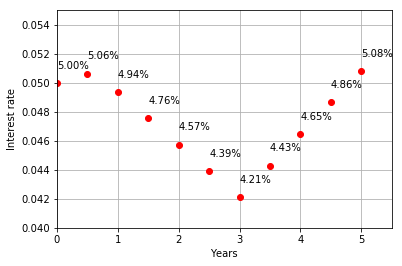

In [15]:
import matplotlib.pyplot as plt

t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
r = [0.05, r_0_5, r_1, r_1_5, r_2, r_2_5, r_3, r_3_5, r_4, r_4_5, r_5]
plt.plot(t, r, 'ro')
plt.xlabel("Years")
plt.ylabel("Interest rate")
plt.axis([0, 5.5, 0.04, 0.055])
plt.grid(True)
for a,b in zip(t, r): 
    plt.text(a, b + 0.001, "{:.2%}".format(b))
plt.show()

---------------------------------------------------------------------------------------
**5. Compute the quadratic Taylor approximation of the function $e^{(x+1)^2}$ around the points 0, -1, and 1, respectively.** 

The quadratic Taylor approximation around a point $a$ of a function has the form
$$f(x) \approx f(a) + (x - a)f'(a) + \frac{(x -a)^2}{2}f''(a)$$
and therefore we need to find $f'(x)$ and $f''(x)$ and evaluate the resulting functions in point $a$

\begin{align}
f'(x) = 2(x+1)e^{(x+1)^2} &&\tag{Chain rule}
\end{align}

\begin{align}
f''(x) &= 4(x+1)^2e^{(x+1)^2} + 2e^{(x+1)^2} &&\tag{Product rule}\\
&= 2e^{(x+1)^2}(2(x+1)^2 + 1)\\
&= (4x^2 + 8x + 6)e^{(x+1)^2} &&\tag{Simplify}\\
\end{align}

As a result, for the points given, the quadratic Taylor approximation is:

\begin{align}
f(x_{a=0}) &\approx e + (x)(2e) + (x^2)(3e)\\ 
f(x_{a=1}) &\approx e^4 + (x-1)(4e^4) + ((x-1)^2)(9e^4)\\ 
f(x_{a=-1}) &\approx 1 + ((x+1)^2)\\ 
\end{align}

![f(0)](5_1.png "f(0)")
![f(1)](5_2.png "f(1)")
![f(-1)](5_3.png "f(-1)")

---------------------------------------------------------------------------------------
**6. Write the second order Taylor approximations of the function $f(x) = xN(x)$ around the point $a = 1$. Here, $N(x)$ is the cumulative density of the standard normal variable. Use the fact that $N(1) = 0.8413$.**

$$f(x_{a=1}) \approx f(1) + (x - 1)f'(1) + \frac{(x - 1)^2}{2}f''(1)$$
where 

\begin{align}
f'(x) = xN'(x) + N(x); &&N'(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}\\
\end{align}

\begin{align}
f'(1) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}} + 0.8413 \approx 0.24197 + 0.8413 \approx 1.08327\\
\end{align}

\begin{align}
f''(x) = xN''(x) + 2N'(x); && N'(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}; && N''(x) = -\frac{1}{\sqrt{2\pi}}xe^{\frac{-x^2}{2}}
\end{align}

\begin{align}
f''(1) = -\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}} + 2(\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}}) \approx 0.24197
\end{align}

$$f(x_{a=1}) \approx 0.8413 + (x - 1)(1.08237) + \frac{(x - 1)^2}{2}0.24197$$

We see that $f(1) = 0.8413$ as expected, other numerical approximations using the algorithm in Table 3.1 of the textbook are shown for reference:
$$f(1.1)_{taylor} \approx 0.8413 + (0.1)(1.08237) + \frac{(0.1)^2}{2}0.24197 \approx 0.95074685$$
$$f(0.8)_{taylor} \approx 0.8413 + (-0.2)(1.08237) + \frac{(-0.2)^2}{2}0.24197 \approx 0.6296654$$


In [16]:
x1 = 1.1
x2 = 0.8
f_x1_taylor = 0.95074685
f_x2_taylor = 0.6296654

N_x1 = cdf_normal(1.1)
N_x2 = cdf_normal(0.8)

f_x1 = x1*N_x1
f_x2 = x2*N_x2

error1 = np.abs(f_x1_taylor - f_x1)/f_x1
error2 = np.abs(f_x2_taylor - f_x2)/f_x2

print("f(1.1) = " + str(f_x1))
print("relative error for f(1.1) = " + "{:.5%}".format(error1))
print("f(0.8) = " + str(f_x2))
print("relative error for f(0.8) = " + "{:.5%}".format(error2))

f(1.1) = 0.950767288522
relative error for f(1.1) = 0.00215%
f(0.8) = 0.630515733068
relative error for f(0.8) = 0.13486%


---------------------------------------------------------------------------------------
**7. Consider an ATM call option with strike 40 on an asset with volatility 30% and paying 1% dividends continuously. 
Assume that the interest rates are constant at 3%. Compute the relative approximation error of the approximation 
$$C_{approx,r \neq 0,q \neq 0}= \sigma S \sqrt{\frac{T}{2\pi}}\left(1 - \frac{(r+q)T}{2}\right) + \frac{(r-q)T}{2}S,$$
if the call option expires in 1, 3, 5, 10, and 20 years.**


In [17]:
def atm_call_approx(S, K, T, sigma, r, q):
    return sigma*S*np.sqrt(T/(2*np.pi))*(1 - ((r+q)*T)/2) + ((r-q)*T*S)/2

def call(S, K, T, sigma, r, q):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*np.exp(-q*T)*cdf_normal(d1) - K*np.exp(-r*T)*cdf_normal(d2)


In [18]:
S = 40
K = 40
sigma = 0.3
q = 0.01
r = 0.03
T = [1, 3, 5, 10, 20]

print ("\n|Time\t|ATM approx.\t\t|Exact formula\t\t|Relative error (%)\t|")
print ("---------------------------------------------------------------------------------")
for time in T:
    approx = atm_call_approx(S, K, time, sigma, r, q)
    exact = call(S, K, time, sigma, r, q)
    relative_error = (approx - exact)/exact
    print("|%d\t|%.15f\t|%.15f\t|%.15f\t|"%(time, approx, exact, relative_error))
print ("---------------------------------------------------------------------------------")


|Time	|ATM approx.		|Exact formula		|Relative error (%)	|
---------------------------------------------------------------------------------
|1	|5.091561217520848	|5.077603102033841	|0.002748957570436	|
|3	|8.994348012073328	|8.906051677920289	|0.009914195127785	|
|5	|11.634270227224965	|11.431348835167864	|0.017751307827544	|
|10	|16.111036105696769	|15.530661321125221	|0.037369611800246	|
|20	|20.845693636299949	|19.517216630825626	|0.068066929347708	|
---------------------------------------------------------------------------------


---------------------------------------------------------------------------------------
**8. Denote by $F = Se^{(r−q)T}$ the forward price corresponding to time $T$ of an asset with spot price $S$ at time $t$, paying dividends continuously at the rate $q$.**

**(i) Show that the Black–Scholes formulas can be written in terms of the forward price as follows:
$$C(S, t) = Ke^{−rT}\left(\frac{F}{K}N(d_1)-N(d_2)\right);$$
$$P(S, t) = Ke^{−rT}\left(N(-d_2) - \frac{F}{K}N(-d_1)\right),$$
where** 

\begin{align}
d_1 = \frac{ln\left(\frac{F}{K}\right)}{\sigma \sqrt{T}} + \frac{\sigma \sqrt{T}}{2}; && d_2 = \frac{ln\left(\frac{F}{K}\right)}{\sigma \sqrt{T}} - \frac{\sigma \sqrt{T}}{2} \\     
\end{align}

The values of $d_1$ and $d_2$ are determined from the corresponding values in the European option formula:

\begin{align}
d_1 &= \frac{ln{\frac{S}{K}} + (r-q+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}\\
&= \frac{ln{\frac{F}{Ke^{(r-q)T}}} + (r-q+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \tag{$F = Se^{(r-q)T}$}\\
&= \frac{ln(F) - ln(K) - ln(e^{(r-q)T})  + (r-q+\frac{\sigma^2}{2}T)}{\sigma \sqrt{T}} \tag{ln properties}\\
&= \frac{ln(F) - ln(K) -(r-q)T  + (r-q+\frac{\sigma^2}{2}T)}{\sigma \sqrt{T}} \tag{$ln(e^{x}) = x$}\\
&= \frac{ln(\frac{F}{K}) + (\frac{\sigma^2}{2}T)}{\sigma \sqrt{T}} \tag{Simplify}\\
&= \frac{ln(\frac{F}{K})}{\sigma \sqrt{T}} + \frac{\sigma \sqrt{T}}{2} \tag{Simplify}\\
&= d_{1, forward}\\
\\
d_2 &= d_1 - \sigma \sqrt{T}\\
&= \frac{ln(\frac{F}{K})}{\sigma \sqrt{T}} + \frac{\sigma \sqrt{T}}{2} - \sigma \sqrt{T} \tag{Def. $d_{1, forward}$}\\
&= \frac{ln(\frac{F}{K})}{\sigma \sqrt{T}} - \frac{\sigma \sqrt{T}}{2} \tag{Simplify}\\
&= d_{2, forward}
\end{align}

Starting from the Black-Scholes formula for European call options:

\begin{align}
C(S,t) &= Se^{-qT}N(d_1) - Ke^{-rT}N(d_2)\\
&= Ke^{-rT}\left(\frac{Se^{-qT}}{Ke^{-rT}}N(d_1) - N(d_2)\right) \tag{Factorize $Ke^{-rT}$}\\
&= Ke^{-rT}\left(\frac{Fe^{-qT}}{Ke^{-rT}e^{(r-q)T}}N(d_1) - N(d_2)\right) \tag{$F = Se^{(r-q)T}$}\\
&= Ke^{-rT}\left(\frac{F}{K}N(d_1) - N(d_2)\right) \tag{Simplify}\\
&= C(S,t)_{forward}
\end{align}

Starting from the Black-Scholes formula for European put options:

\begin{align}
P(S,t) &= Ke^{-rT}N(-d_2) - Se^{-qT}N(-d_1)\\
&= Ke^{-rT}\left(N(-d_2) - \frac{Se^{-qT}}{Ke^{-rT}}N(-d_1)\right) \tag{Factorize $Ke^{-rT}$}\\
&= Ke^{-rT}\left(N(-d_2) - \frac{Fe^{-qT}}{Ke^{-rT}e^{(r-q)T}}N(-d_1)\right) \tag{$F = Se^{(r-q)T}$}\\
&= Ke^{-rT}\left(N(-d_2) - \frac{F}{K}N(-d_1)\right) \tag{Simplify}\\
&= P(S,t)_{forward}
\end{align}

**(ii) Show that the values of the at the money forward call and put options are equal; an at the money forward option is struck at the forward price, i.e., $K = F = Se^{(r−q)(T −t)}$.**

\begin{align}
C(S,t)_{forward} = &Ke^{-rT}\left(\frac{F}{K}N(d_1) - N(d_2)\right)\\
&= Se^{(r-q)T} e^{-rT}\times\\
&\left(N\left(\frac{\sigma\sqrt{T}}{2}\right) - N\left(-\frac{\sigma\sqrt{T}}{2}\right) \right) \tag{$K = F = Se^{(r−q)T}$}\\
&= Se^{-qT}\left(N\left(\frac{\sigma\sqrt{T}}{2}\right) - N\left(-\frac{\sigma\sqrt{T}}{2}\right)\right) \tag{Simplify}\\
&= Se^{-qT}\left(2N\left(\frac{\sigma\sqrt{T}}{2}\right) - 1\right) \tag{$N(-a) = 1 - N(a)$}\\
\\
P(S,t)_{forward} &= Ke^{-rT}\left(N(-d_2) - \frac{F}{K}N(-d_1)\right)\\
&= Se^{-qT}\left(N\left(\frac{\sigma\sqrt{T}}{2}\right) - N\left(-\frac{\sigma\sqrt{T}}{2}\right)\right) \tag{$K = F = Se^{(r−q)T}$}\\
&= Se^{-qT}\left(2N\left(\frac{\sigma\sqrt{T}}{2}\right) - 1\right) \tag{$N(-a) = 1 - N(a)$}\\
&= C(S,t)_{forward}
\end{align}

**(iii) Find an approximation formula for the value of at the money forward call and put options.**  

The first-degree Taylor approximation for the normal cumulative distribution function close to point a=0 is:

\begin{align}
N(x) \approx N(0) + N'(0) \approx \frac{1}{2} + \frac{x}{\sqrt{2\pi}} 
\end{align}

Since, in normal situations, the factor $\frac{\sigma\sqrt{T}}{2}$ is close to zero, we can use the above to find an approximate value:

\begin{align}
N\left(\frac{\sigma\sqrt{T}}{2\sqrt{2\pi}}\right) \approx \frac{1}{2} + \frac{\sigma\sqrt{T}}{2\sqrt{2\pi}} 
\end{align}

Therefore, for the ATM call and put forward option values:

\begin{align}
C(S,t)_{forward} = P(S,t)_{forward} &= Se^{-qT}\left(2N\left(\frac{\sigma\sqrt{T}}{2}\right) - 1\right)\\
&\approx Se^{-qT}\left(2\left(\frac{1}{2} + \frac{\sigma\sqrt{T}}{2\sqrt{2\pi}}\right) - 1\right)\\
&\approx Se^{-qT}\left(\frac{\sigma\sqrt{T}}{\sqrt{2\pi}}\right)\\
&\approx 0.4Se^{-qT}\sigma\sqrt{T}\\
\end{align}
